In [5]:
%%cython
cdef extern from "lw_drobyshev_task.c":
    # расчет итерациями запаздывающего момента
    double tlag(long double x, long double y, long double z, long double t, 
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap))
    # отношение радиуса Лиенара Вихерта к радиусу
    double klw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap))
    # Радиус Лиенара Вихерта
    double Rlw(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap))
    
    
    # phi_lw - скалярный потенциал Лиенара Вихерта
    double philw(long double x, long double y, long double z, long double t,
               long double (*Coordinate)(long double t_zap),
               long double (*Coordinate)(long double t_zap),
               long double (*Coordinate)(long double t_zap),
               long double (*Velocity)(long double t_zap),
               long double (*Velocity)(long double t_zap),
               long double (*Velocity)(long double t_zap),
               long double q)


    # A_lw - векторный потенциал Лиенара Вихерта
    void Alw(long double x, long double y, long double z, long double t,
             long double (*Coordinate)(long double t_zap),
             long double (*Coordinate)(long double t_zap),
             long double (*Coordinate)(long double t_zap),
             long double (*Velocity)(long double t_zap),
             long double (*Velocity)(long double t_zap),
             long double (*Velocity)(long double t_zap),
             long double q,
             long double * A_x, long double * A_y, long double * A_z
           )
    
    void electr_magnet(long double x, long double y, long double z, long double t,
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Coordinate)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Velocity)(long double t_zap),
                long double (*Acceleration)(long double t_zap),
                long double (*Acceleration)(long double t_zap),
                long double (*Acceleration)(long double t_zap),
                long double q,
                long double * E_x, long double * E_y, long double * E_z,
                long double * B_x, long double * B_y, long double * B_z)

    void set_c(long double _c)

# Drobyshev's test
# Как запаздывающий Лиенар-Вихерт становится "незапаздывающим". Визуализация
# http://www.sciteclibrary.ru/cgi-bin/yabb2/YaBB.pl?num=1528093569/0

import numpy as np
cdef long double c = np.float128(1)
cdef long double vk = np.float128(0.84) # finish velocity
cdef long double a = np.float128(0.3)   # acseleration
cdef long double t0 = vk/a # time of acseleration

cdef long double sx(long double t):
    cdef long double result
    result = (0 if t < 0 else (a * t*t / 2 if t < t0 else vk * t - a * t0*t0 / 2))
    return result
cdef long double sy(long double t):
    cdef long double result
    result = 0
    return result
cdef long double sz(long double t):
    cdef long double result
    result = 0
    return result

cdef long double vx(long double t):
    cdef long double result
    result = (0 if t < 0 else (a * t       if t < t0 else vk))
    return result
cdef long double vy(long double t):
    cdef long double result
    result = 0
    return result
cdef long double vz(long double t):
    cdef long double result
    result = 0
    return result


cdef long double wx(long double t):
    cdef long double result
    result = (0 if t < 0 else (a           if t < t0 else 0))
    return result
cdef long double wy(long double t):
    cdef long double result
    result = 0
    return result
cdef long double wz(long double t):
    cdef long double result
    result = 0
    return result

def R_lw(x, y, z, t):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    set_c(1.0)
    cdef long double r_lw = Rlw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz)

    return r_lw

def phi_lw(x, y, z, t, q):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef double ta = t
    set_c(1.0)
    cdef long double q_ = q
    #print(x, y, z, t)
    #print(Xa, Ya, Za, ta)
    #print(sx(ta))
    set_c(1.0)
    cdef long double philw_ = philw(Xa, Ya, Za, ta, sx, sy, sz, vx, vy, vz, q_)

    return philw_


def A_lw(x, y, z, t, q):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    set_c(1.0)
    cdef long double q_ = q
    
    cdef long double A_x
    cdef long double A_y
    cdef long double A_z
    
    Alw(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz,
                  q_,
                  &A_x, &A_y, &A_z)

    return (A_x, A_y, A_z)

def EB_lw(x, y, z, t, q):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    set_c(1.0)
    cdef long double q_ = q
    
    cdef long double E_x
    cdef long double E_y
    cdef long double E_z
    cdef long double B_x
    cdef long double B_y
    cdef long double B_z
    
    electr_magnet(Xa, Ya, Za, ta,
                  sx, sy, sz, vx, vy, vz, wx, wy, wz,
                  q_,
                  &E_x, &E_y, &E_z, &B_x, &B_y, &B_z)

    return (E_x, E_y, E_z, B_x, B_y, B_z)

def t_lag(x, y, z, t):
    cdef long double Xa = x
    cdef long double Ya = y
    cdef long double Za = z
    cdef long double ta = t
    set_c(1.0)
    cdef long double q = 1
    # расчет итерациями запаздывающего момента
    cdef long double lag = tlag(Xa, Ya, Za, ta, sx, sy, sz)
    return lag

In [10]:
EB_lw(Xa, Ya, Za, t_cur, q)

(-2.0, -2.0, -2.0, -2.0, -2.0, -2.0)

In [17]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

xa_linspace = np.linspace(np.float128(-10), np.float128(+20), 30*2)
ya_linspace = np.linspace(np.float128(-10), np.float128(+10), 20*2)

xa_list = xa_linspace.tolist()
ya_list = ya_linspace.tolist()

xa_grid,ya_grid = np.meshgrid(xa_linspace, ya_linspace)

u_ = xa_grid * np.nan
v_ = ya_grid * np.nan
e_ = xa_grid * np.nan

t_ = ya_grid * np.nan
rlw_ = ya_grid * np.nan
s_ = ya_grid * np.nan
bz_ = ya_grid * np.nan

ax_ = ya_grid * np.nan

sx_ = ya_grid * np.nan
sy_ = ya_grid * np.nan
sz_ = ya_grid * np.nan

bz_min = +np.finfo(np.float64).max
bz_max = -np.finfo(np.float64).max

sx_min = +np.finfo(np.float64).max
sx_max = -np.finfo(np.float64).max

sy_min = +np.finfo(np.float64).max
sy_max = -np.finfo(np.float64).max

t_cur = 7.5
q = 1

#def make_R():
for ix in np.arange(0, len(xa_linspace), 1):
    for iy in np.arange(0, len(ya_linspace), 1):

        Xa = xa_list[ix]
        Ya = ya_list[iy]
        Za = 0.0
        R = R_lw(Xa, Ya, Za, t_cur)
        rlw_[iy][ix] = R

        (E_x, E_y, E_z, B_x, B_y, B_z) = EB_lw(Xa, Ya, Za, t_cur, q)
        (A_x, A_y, A_z) = A_lw(Xa, Ya, Za, t_cur, q)
        # The Poynting vector S is defined as to be equal
        # to the cross product (1/μ)E × B
        S_x = E_y * B_z - E_z * B_y
        S_y = E_z * B_x - E_x * B_z
        S_z = E_x * B_y - E_y * B_x
        sx_[iy][ix] = S_x
        sy_[iy][ix] = S_y
        sz_[iy][ix] = S_z
        
        ax_[iy][ix] = A_x

        if sx_min > S_x:
            sx_min = S_x
        if sx_max < S_x:
            sx_max = S_x        

        if sy_min > S_y:
            sy_min = S_y
        if sy_max < S_y:
            sy_max = S_y


        u_[iy][ix] = E_x
        v_[iy][ix] = E_y
        e_[iy][ix] = sqrt(E_x*E_x + E_y*E_y)

        t2 = t_lag(Xa, Ya, 0, t_cur)
        t_[iy][ix] = t2


        phi_ = phi_lw(Xa, Ya, 0, t_cur, q)
        s_[iy][ix] = phi_
        bz_[iy][ix] = B_z
        if bz_min > B_z:
            bz_min = B_z
        if bz_max < B_z:
            bz_max = B_z

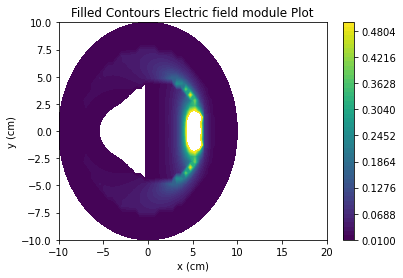

In [18]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, e_, levels = np.linspace(0.01, 0.5, int(0.5/0.01+1.0)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Electric field module Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

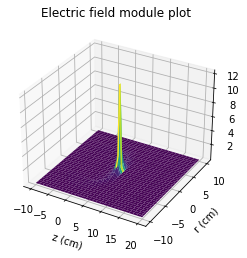

In [19]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.set_xlabel('z (cm)')
ax.set_ylabel('r (cm)')
ax.plot_surface(xa_grid,ya_grid, e_, cmap='viridis', edgecolor='none')
ax.set_title('Electric field module plot')
plt.show()

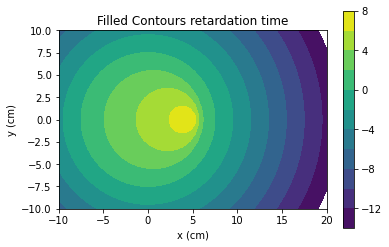

In [20]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, t_, levels = np.linspace(-14, 8, 22/2+1))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours retardation time')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

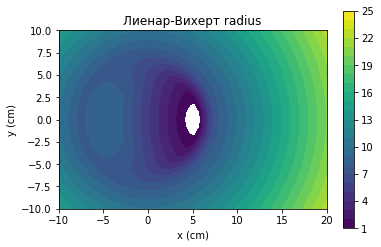

In [21]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, rlw_, levels = np.linspace(1, 25, 24/1+1))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Лиенар-Вихерт radius')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

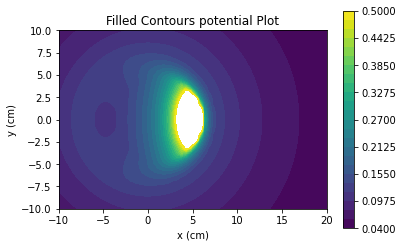

In [22]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, s_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours potential Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

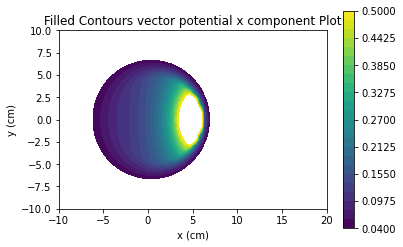

In [23]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, ax_, levels = np.linspace(0.04, 0.5, int((1-0.04)/0.04+1)))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours vector potential x component Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

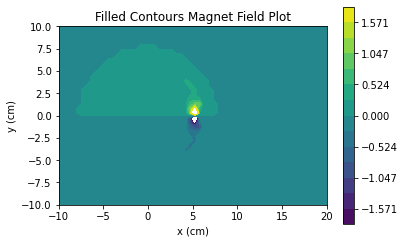

In [24]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, bz_, levels = np.linspace(bz_min/5, bz_max/5, 15))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Magnet Field Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

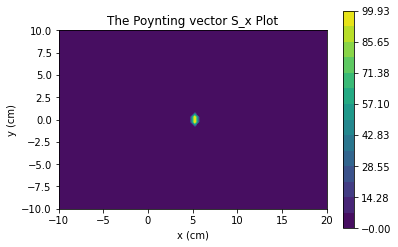

In [15]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, sx_, levels = np.linspace(sx_min, sx_max, 15))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('The Poynting vector S_x Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()

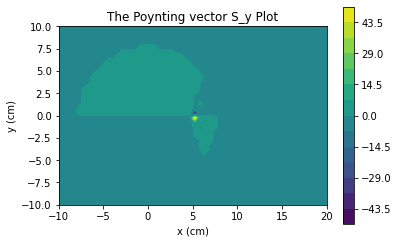

In [16]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xa_grid,ya_grid, sy_, levels = np.linspace(sy_min, sy_max, 15))
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('The Poynting vector S_y Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_aspect(1)
plt.show()